### Student Information
Name: 謝安亭

Student ID: 110065516

GitHub ID: antinghsieh555

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

---

<h1> *** Section 3 ***</h1>
<h2># Data Mining Lab 1</h2>

- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


---

### Preprocessing

In [1]:
# import packages
import os
import pandas as pd
import helpers.data_mining_helpers as dmh

import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
# get file
root = './sentiment labelled sentences/'

files = os.listdir(root)

if '.DS_Store' and 'readme.txt' in files:
    files.remove('.DS_Store')
    files.remove('readme.txt')

# get company name 
companies = []
for file in files:
    companies.append(file.split("_")[0])

# read file
df_amazon = pd.read_csv(root+files[0], names=['text', 'score'], header=None,delimiter='\t',dtype = str)
df_yelp = pd.read_csv(root+files[1], names=['text', 'score'], header=None,delimiter='\t',dtype = str)
df_imdb = pd.read_csv(root+files[2], names=['text', 'score'], header=None,delimiter='\t',dtype = str)# get file
root = './sentiment labelled sentences/'

files = os.listdir(root)

if '.DS_Store' and 'readme.txt' in files:
    files.remove('.DS_Store')
    files.remove('readme.txt')

# get company name 
companies = []
for file in files:
    companies.append(file.split("_")[0])

# read file
df_amazon = pd.read_csv(root+files[0], names=['text', 'score'], header=None,delimiter='\t',dtype = str)
df_yelp = pd.read_csv(root+files[1], names=['text', 'score'], header=None,delimiter='\t',dtype = str)
df_imdb = pd.read_csv(root+files[2], names=['text', 'score'], header=None,delimiter='\t',dtype = str)

In [3]:
# add company name in the dataframe
df_amazon['company'] = companies[0]
df_yelp['company'] = companies[1]
df_imdb['company'] = companies[2]

In [4]:
df = pd.concat([df_amazon,df_yelp,df_imdb])
df

,text,score,company
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


In [5]:
# Make company Name into dummy code
df["companyLabel"] = pd.factorize(df["company"])[0]
df

,text,score,company,companyLabel
0,So there is no way for me to plug it in here i...,0,amazon,0
1,"Good case, Excellent value.",1,amazon,0
2,Great for the jawbone.,1,amazon,0
3,Tied to charger for conversations lasting more...,0,amazon,0
4,The mic is great.,1,amazon,0
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb,2
744,"Unfortunately, any virtue in this film's produ...",0,imdb,2
745,"In a word, it is embarrassing.",0,imdb,2
746,Exceptionally bad!,0,imdb,2


In [6]:
df[["company", "companyLabel"]]

,company,companyLabel
0,amazon,0
1,amazon,0
2,amazon,0
3,amazon,0
4,amazon,0
...,...,...
743,imdb,2
744,imdb,2
745,imdb,2
746,imdb,2


In [7]:
# Make df['companyLabel'] into binary code
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.companyLabel)
df['bin_companyLable'] = mlb.transform(df['companyLabel']).tolist()
df['bin_companyName'] = mlb.transform(df['companyLabel']).tolist()
df

,text,score,company,companyLabel,bin_companyLable,bin_companyName
0,So there is no way for me to plug it in here i...,0,amazon,0,"[1, 0, 0]","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,0,"[1, 0, 0]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,0,"[1, 0, 0]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,0,"[1, 0, 0]","[1, 0, 0]"
4,The mic is great.,1,amazon,0,"[1, 0, 0]","[1, 0, 0]"
...,...,...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb,2,"[0, 0, 1]","[0, 0, 1]"
744,"Unfortunately, any virtue in this film's produ...",0,imdb,2,"[0, 0, 1]","[0, 0, 1]"
745,"In a word, it is embarrassing.",0,imdb,2,"[0, 0, 1]","[0, 0, 1]"
746,Exceptionally bad!,0,imdb,2,"[0, 0, 1]","[0, 0, 1]"


---

## 1. Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

### A. Pie chart to visualize company

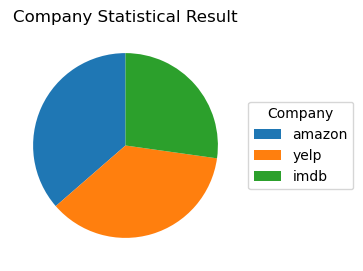

In [8]:
# Pie chart
sta_data = df.company.value_counts()
# print (sta_data)

company_list = df.company.unique()
# print(company_list)

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))



wedges, texts = ax.pie(sta_data,
                       textprops=dict(color="w"),
                       startangle=90,)

ax.legend(wedges, company_list,
          title="Company",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Company Statistical Result")

plt.show()



### B. Word Cloud visualize text

In [9]:
# install packge
!pip install wordcloud

In [10]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

### - All comments word cloud 

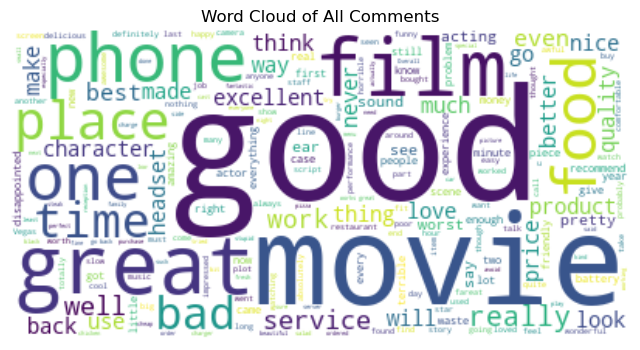

In [11]:
# draw word cloud figure
text = " ".join(i for i in df.text)
# text = " ".join(i for i in df.text)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of All Comments') 
plt.axis("off")
plt.show()

In [12]:
positive = df.loc[lambda f: f.score == '1'].text

In [13]:
negative = df.loc[lambda f: f.score == '0'].text

### - Positive comments word cloud 

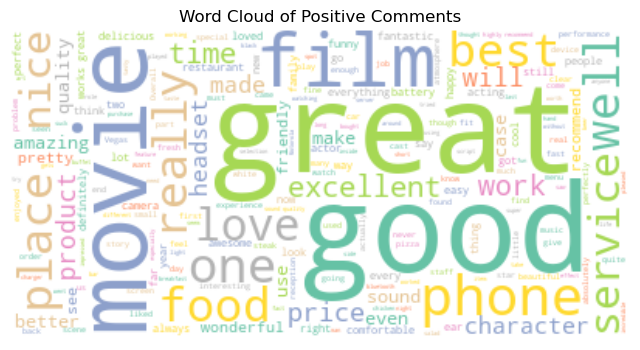

In [14]:
# draw word cloud figure
text = " ".join(i for i in positive)
# text = " ".join(i for i in df.text)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap="Set2", background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Comments') 
plt.axis("off")
plt.show()

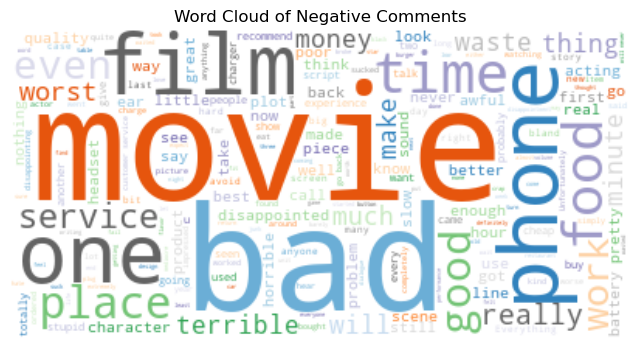

In [15]:
# draw word cloud figure
text = " ".join(i for i in negative)
# text = " ".join(i for i in df.text)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,colormap="tab20c", background_color="white").generate(text)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Comments') 
plt.axis("off")
plt.show()
